<a href="https://colab.research.google.com/github/00Huang/Python-/blob/main/%E4%BD%BF%E7%94%A8%E3%80%8E%E9%9D%9E%E7%B7%9A%E6%80%A7%E8%BF%B4%E6%AD%B8%E5%A4%9A%E9%A0%85%E5%BC%8F%E3%80%8F%E6%A8%A1%E5%9E%8B%E4%BE%86%E9%A0%90%E6%B8%AC%E3%80%8E%E7%BE%8E%E5%85%83_%E9%BB%83%E9%87%91%E9%97%9C%E4%BF%82%E3%80%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#讀入檔案
import pandas as pd
df = pd.read_excel("https://acupun.site/lecture/predict/example/resource/usd-gold.xlsx", "美元黃金對應")
df

,美元,黃金
0,29.860,1583.10
1,29.780,1615.00
2,29.695,1651.35
3,29.715,1642.80
4,29.685,1643.80
5,29.665,1674.75
6,29.670,1680.25
7,29.635,1701.65
8,29.625,1704.65
9,29.665,1711.10


In [ ]:
#建立3次多項式數學模型
from sklearn.preprocessing import PolynomialFeatures
model = PolynomialFeatures(degree=5)

In [ ]:
#計算(一元)多項式函數的X
x_poly = model.fit_transform(df[["美元"]])

In [ ]:
#做出y=f(x_poly)的迴歸線
import sklearn.linear_model as lm
model2 = lm.LinearRegression()

In [ ]:
#讓新模型model2學習歷史數據（x_ploy)
model2.fit(x_poly, df[["黃金"]])

LinearRegression()

In [ ]:
#進行預測（當美元=29.75，黃金的價位=？）
model2.predict(model.fit_transform([[29.75]]))
print("當美元=29.75的黃金價位 = ", model2.predict(model.fit_transform([[29.75]])).round(2))

當美元=29.75的黃金價位 =  [[1625.9]]


In [ ]:
#--------------------------------------
# colab繪圖顯示繁體中文
#--------------------------------------
import matplotlib
#colab顯示繁體中文 問題：matplotlib繪圖，會發生中文無法顯示的問題
# 先下載台北黑體字型
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download import matplotlib
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 將 font-family 設為 Taipei Sans TC Beta
# 設定完後，之後的圖表都可以顯示中文了
matplotlib.rc('font', family='Taipei Sans TC Beta')

/bin/bash: line 1: import: command not found
--2024-04-21 07:37:52--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.6.139, 142.251.6.113, 142.251.6.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.6.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-04-21 07:37:52--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.196.132, 2607:f8b0:4001:c1a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.196.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  --.-

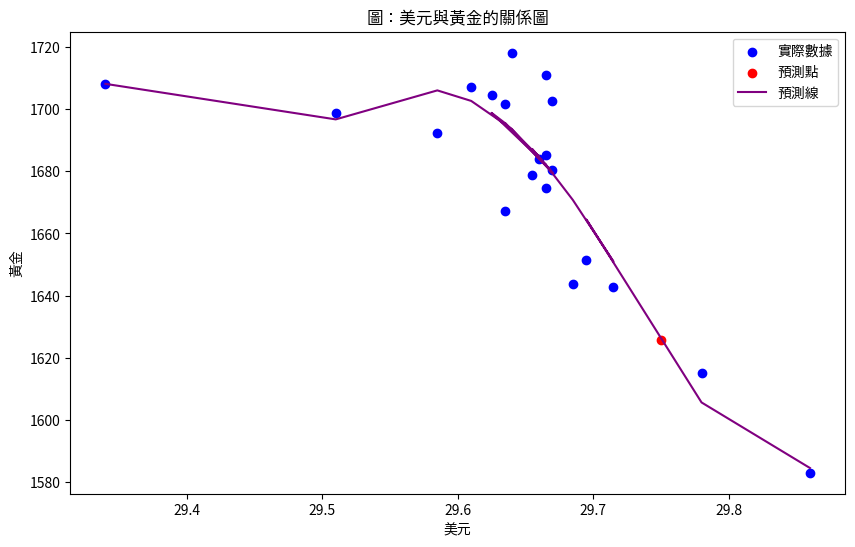

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

#1.畫圖：點的散佈圖
plt.scatter(df['美元'], df['黃金'], color='blue', label="實際數據")

#2.畫圖：畫預測點
plt.scatter([29.75], model2.predict(model.fit_transform([[29.75]])), color='red', label="預測點")

#3.畫圖：畫預測線
plt.plot(df['美元'], model2.predict(model.fit_transform(df[['美元']])), color='purple', label="預測線")

plt.xlabel("美元")
plt.ylabel("黃金")
plt.title('圖：美元與黃金的關係圖')
plt.legend()
plt.show()